In [100]:
%pip install numpy pandas scikit-learn matplotlib seaborn
%pip install setuptools
%pip install tensorflow

In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

In [102]:
# Set random seed for reproducibility
np.random.seed(42)

def get_finger_values(gesture):
    """Generate realistic finger values for a given gesture."""
    gestures = {
        'A': {'thumb': 200, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'B': {'thumb': 900, 'index': 0, 'middle': 0, 'ring': 0, 'pinky': 0},
        'C': {'thumb': 500, 'index': 500, 'middle': 500, 'ring': 500, 'pinky': 500},
        'D': {'thumb': 200, 'index': 0, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'E': {'thumb': 500, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'F': {'thumb': 200, 'index': 700, 'middle': 0, 'ring': 0, 'pinky': 0},
        'G': {'thumb': 0, 'index': 0, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'H': {'thumb': 0, 'index': 0, 'middle': 0, 'ring': 1000, 'pinky': 1000},
        'I': {'thumb': 500, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 0},
        'J': {'thumb': 500, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 0},
        'K': {'thumb': 0, 'index': 0, 'middle': 0, 'ring': 1000, 'pinky': 1000},
        'L': {'thumb': 0, 'index': 0, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'M': {'thumb': 800, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'N': {'thumb': 800, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'O': {'thumb': 400, 'index': 700, 'middle': 700, 'ring': 700, 'pinky': 700},
        'P': {'thumb': 0, 'index': 0, 'middle': 700, 'ring': 1000, 'pinky': 1000},
        'Q': {'thumb': 0, 'index': 700, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'R': {'thumb': 800, 'index': 0, 'middle': 0, 'ring': 1000, 'pinky': 1000},
        'S': {'thumb': 500, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'T': {'thumb': 400, 'index': 700, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'U': {'thumb': 500, 'index': 0, 'middle': 0, 'ring': 1000, 'pinky': 1000},
        'V': {'thumb': 500, 'index': 0, 'middle': 0, 'ring': 1000, 'pinky': 1000},
        'W': {'thumb': 500, 'index': 0, 'middle': 0, 'ring': 0, 'pinky': 1000},
        'X': {'thumb': 500, 'index': 700, 'middle': 1000, 'ring': 1000, 'pinky': 1000},
        'Y': {'thumb': 0, 'index': 1000, 'middle': 1000, 'ring': 1000, 'pinky': 0}
    }
    finger_values = gestures.get(gesture, {'thumb': 0, 'index': 0, 'middle': 0, 'ring': 0, 'pinky': 0})

    # Add random noise for realism and clip values within [0, 1023]
    for finger in finger_values:
        finger_values[finger] += np.random.randint(-50, 50)
        finger_values[finger] = np.clip(finger_values[finger], 0, 1023)

    return finger_values

def generate_asl_data(n_samples_per_gesture=200):
    """Generate a DataFrame with ASL gesture data."""
    data = {'thumb': [], 'index': [], 'middle': [], 'ring': [], 'pinky': [], 'label': []}
    gestures = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    for gesture in gestures:
        for _ in range(n_samples_per_gesture):
            finger_values = get_finger_values(gesture)
            for finger in data.keys():
                if finger != 'label':
                    data[finger].append(finger_values[finger])
            data['label'].append(gesture)

    return pd.DataFrame(data)

# Generate data and split into training and testing sets
data = generate_asl_data()


In [103]:
X = data[['thumb', 'index', 'middle', 'ring', 'pinky']]
y = pd.get_dummies(data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [104]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(len(y.columns), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2247 - loss: 93.8716 - val_accuracy: 0.6731 - val_loss: 1.8698
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6627 - loss: 1.7164 - val_accuracy: 0.6885 - val_loss: 1.7976
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6946 - loss: 1.6662 - val_accuracy: 0.7212 - val_loss: 1.7157
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6912 - loss: 2.4457 - val_accuracy: 0.6769 - val_loss: 2.0755
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7020 - loss: 1.4595 - val_accuracy: 0.7462 - val_loss: 1.2264
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7139 - loss: 1.7191 - val_accuracy: 0.7635 - val_loss: 0.9958
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7057 - loss: 1.7624 - val_accuracy: 0.7423 - val_loss: 0.7579
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 1.1353 - val_accuracy: 0.6990 - val

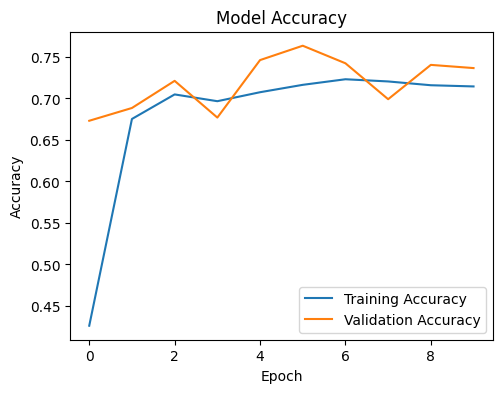

In [105]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


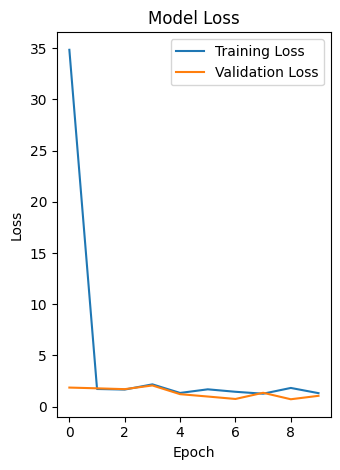

In [106]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


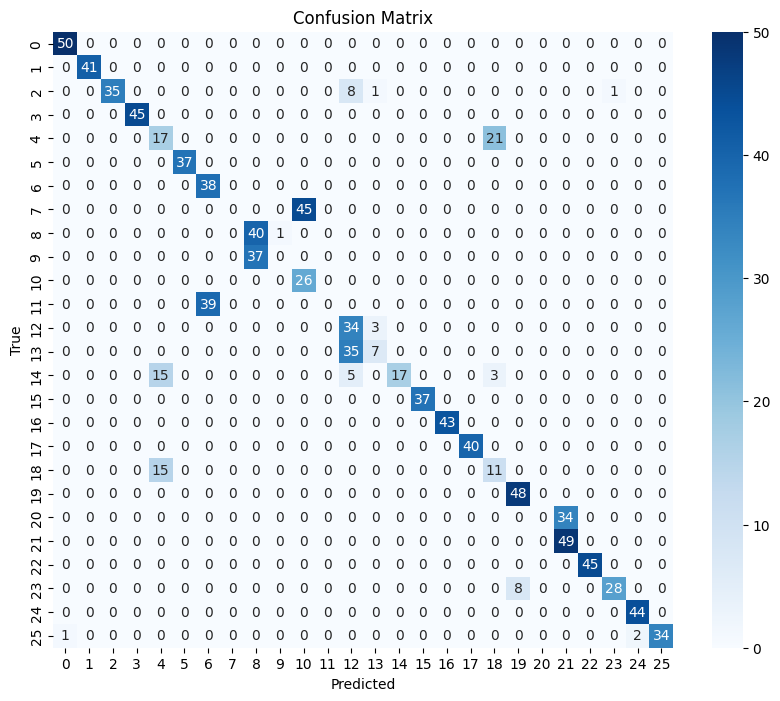

In [107]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1) # Remove .values
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [109]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('gesture_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpfli6se1h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_150')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  135453782859920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135453782852880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135453782859568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135453782858336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135453782858512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135453782860272: TensorSpec(shape=(), dtype=tf.resource, name=None)
